<a href="https://colab.research.google.com/github/rodrigopbbr/mineracao_de_dados/blob/main/Preprocessamento_com_dataset_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="https://github.com/storopoli/ciencia-de-dados/blob/master/notebooks/images/titanic.png?raw=1" alt="titanic" style="width: 500px;"/>

In [ ]:
# import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
titanic = sns.load_dataset('titanic')





In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})



In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


#Selecionando atributos manualmente

In [ ]:
feature_names = ['pclass', 'female', 'age', 'fare']

feature_names 

['pclass', 'female', 'age', 'fare']

In [ ]:
X = titanic[feature_names].to_numpy()
titanic[feature_names]

,pclass,female,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [ ]:
y = titanic['survived'].to_numpy()

In [ ]:
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714
titanic[feature_names]

,pclass,female,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
885,3,1,39.0,29.1250
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
889,1,0,26.0,30.0000


#Mapa de Calor da correlação entre atributos

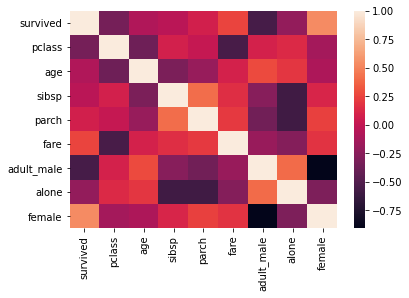

In [ ]:
sns.heatmap(titanic.corr(), 
            xticklabels=titanic.corr().columns.values,
            yticklabels=titanic.corr().columns.values)

#scatter plot de 2 atributos

In [ ]:
scatterplot1 = px.scatter(titanic,x='sex',y='female')
scatterplot1.show()

#matriz de correlação

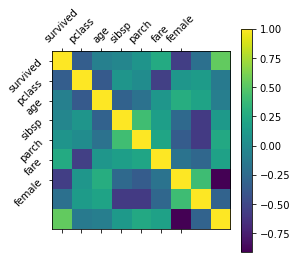

In [ ]:
# Correlation matrix
plt.matshow(titanic.corr())
continuous_features = titanic.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.colorbar()
plt.show()

#Histograma de um atributo

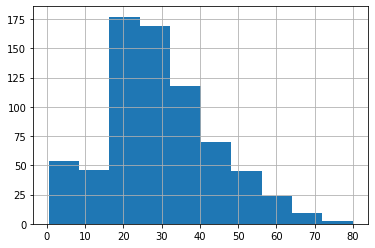

In [ ]:
titanic['age'].hist()

#Analisando os dados

In [ ]:
# Unique values
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#Agrupando os dados

In [ ]:
# Grouping
survived_group = titanic.groupby('survived')
survived_group.mean()

,pclass,age,sibsp,parch,fare,adult_male,alone,female
survived,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239,0.147541
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608,0.681287


#Verificando atributos com valores nulos

In [ ]:
# Rows with at least one NaN value
titanic[pd.isnull(titanic).any(axis=1)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0


#Excluindo atributos com valores nulos

In [ ]:
# Drop rows with Nan values
titanic = titanic.dropna() # removes rows with any NaN values
titanic = titanic.reset_index() # reset's row indexes in case any rows were dropped
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,female
0,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
1,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
2,6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
3,10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1
4,11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1


#Excluindo atributos manualmente

In [ ]:
# Dropping multiple columns
titanic = titanic.drop(['class', 'who', 'alone'], axis=1) # we won't use text features for our initial basic models
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,female
0,1,1,1,female,38.0,1,0,71.2833,C,False,C,Cherbourg,yes,1
1,3,1,1,female,35.0,1,0,53.1000,S,False,C,Southampton,yes,1
2,6,0,1,male,54.0,0,0,51.8625,S,True,E,Southampton,no,0
3,10,1,3,female,4.0,1,1,16.7000,S,False,G,Southampton,yes,1
4,11,1,1,female,58.0,0,0,26.5500,S,False,C,Southampton,yes,1


# Discretizando os valores ou mapeando os valores

In [ ]:
# Map feature values
titanic['sex'] = titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['embarked'] = titanic['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,female
0,1,1,1,0,38.0,1,0,71.2833,1,False,C,Cherbourg,yes,1
1,3,1,1,0,35.0,1,0,53.1000,0,False,C,Southampton,yes,1
2,6,0,1,1,54.0,0,0,51.8625,0,True,E,Southampton,no,0
3,10,1,3,0,4.0,1,1,16.7000,0,False,G,Southampton,yes,1
4,11,1,1,0,58.0,0,0,26.5500,0,False,C,Southampton,yes,1


#Salvando para CSV

In [ ]:
# Saving dataframe to CSV
titanic.to_csv('preprocessed_titanic.csv', index=False)